In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as dd
import dask.array as da
import dask.bag as db
from sklearn.ensemble import RandomForestClassifier



In [6]:
file_path = "/Users/georgenwachukwu/Desktop/SECOND YEAR/Second semester/Big Data Project 5011/Assesment/Trips_by_Distance.csv"
file_path_full = "/Users/georgenwachukwu/Desktop/SECOND YEAR/Second semester/Big Data Project 5011/Assesment/Trips_Full Data.csv"

df = pd.read_csv(file_path)
df_full = pd.read_csv(file_path_full)

In [7]:
clean_df=df.dropna()
clean_df_full=df_full.dropna()
clean_df.info()

#Convert 'Date' column to datetime
clean_df['Date'] = pd.to_datetime(clean_df['Date'])

# Remove leading/trailing whitespaces from 'County Name' column
clean_df['County Name'] = clean_df['County Name'].str.strip()

# Group by 'Week' and calculate average number of people staying at home per week
avg_people_staying_at_home_per_week = clean_df.groupby('Week')['Population Staying at Home'].mean()
print(avg_people_staying_at_home_per_week)

clean_df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 988773 entries, 21061 to 1048574
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Level                           988773 non-null  object 
 1   Date                            988773 non-null  object 
 2   State FIPS                      988773 non-null  float64
 3   State Postal Code               988773 non-null  object 
 4   County FIPS                     988773 non-null  float64
 5   County Name                     988773 non-null  object 
 6   Population Staying at Home      988773 non-null  float64
 7   Population Not Staying at Home  988773 non-null  float64
 8   Number of Trips                 988773 non-null  float64
 9   Number of Trips <1              988773 non-null  float64
 10  Number of Trips 1-3             988773 non-null  float64
 11  Number of Trips 3-5             988773 non-null  float64
 12  Number of Trips 

,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,...,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month
21061,County,2021-06-06,56.0,WY,56045.0,Weston County,1268.0,5659.0,22471.0,4160.0,...,1558.0,5723.0,2202.0,3930.0,1160.0,166.0,23.0,56-56045-20210606,23,6
22762,County,2021-06-06,5.0,AR,5011.0,Bradley County,1780.0,8983.0,25022.0,3411.0,...,4321.0,3343.0,1793.0,1383.0,690.0,35.0,0.0,05-05011-20210606,23,6
22763,County,2021-06-06,5.0,AR,5013.0,Calhoun County,571.0,4618.0,17543.0,2166.0,...,3600.0,4277.0,1141.0,530.0,425.0,41.0,0.0,05-05013-20210606,23,6
22764,County,2021-06-06,5.0,AR,5015.0,Carroll County,4386.0,23994.0,77047.0,14712.0,...,13170.0,14712.0,4272.0,1227.0,1323.0,132.0,36.0,05-05015-20210606,23,6
22765,County,2021-06-06,5.0,AR,5017.0,Chicot County,1356.0,8762.0,31550.0,9483.0,...,3929.0,3857.0,1380.0,580.0,957.0,61.0,4.0,05-05017-20210606,23,6


In [32]:
df.duplicated().unique()

df_USA = df[df['Level'] == 'National'] [['Population Staying at Home', 'Date']]
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Level                           1048575 non-null  object 
 1   Date                            1048575 non-null  object 
 2   State FIPS                      1047674 non-null  float64
 3   State Postal Code               1047674 non-null  object 
 4   County FIPS                     1001723 non-null  float64
 5   County Name                     1001723 non-null  object 
 6   Population Staying at Home      1035625 non-null  float64
 7   Population Not Staying at Home  1035625 non-null  float64
 8   Number of Trips                 1035625 non-null  float64
 9   Number of Trips <1              1035625 non-null  float64
 10  Number of Trips 1-3             1035625 non-null  float64
 11  Number of Trips 3-5             1035625 non-null  float64
 12  

In [9]:
average = df_USA
average['Date'] = pd.to_datetime(average['Date']) 
average = average.groupby(average['Date'].dt.year)['Population Staying at Home'].mean() 
average = average.reset_index() 
average ['Population Staying at Home' ] = average['Population Staying at Home'] / 1000000 
average.round(decimals=2) 

,Date,Population Staying at Home
0,2019,63.39
1,2020,81.24
2,2021,75.58


In [10]:
#make a new dataset with the mean values for each column from df2
meandata = df_full.mean(numeric_only= True) / 1000000 / 7 # avg per day in millions 
meandata.drop (['Year of Date', 'People Not Staying at Home', 'Population Staying at Home', 'Trips'], inplace=True)
meandata

Trips <1 Mile           46.568052
Trips 1-25 Miles       145.079352
Trips 1-3 Miles         52.782380
Trips 10-25 Miles       33.011216
Trips 100-250 Miles      0.978590
Trips 100+ Miles         1.731782
Trips 25-100 Miles      12.576779
Trips 25-50 Miles        9.879876
Trips 250-500 Miles      0.261320
Trips 3-5 Miles         25.936548
Trips 5-10 Miles        33.349209
Trips 50-100 Miles       2.696903
Trips 500+ Miles         0.491872
dtype: float64

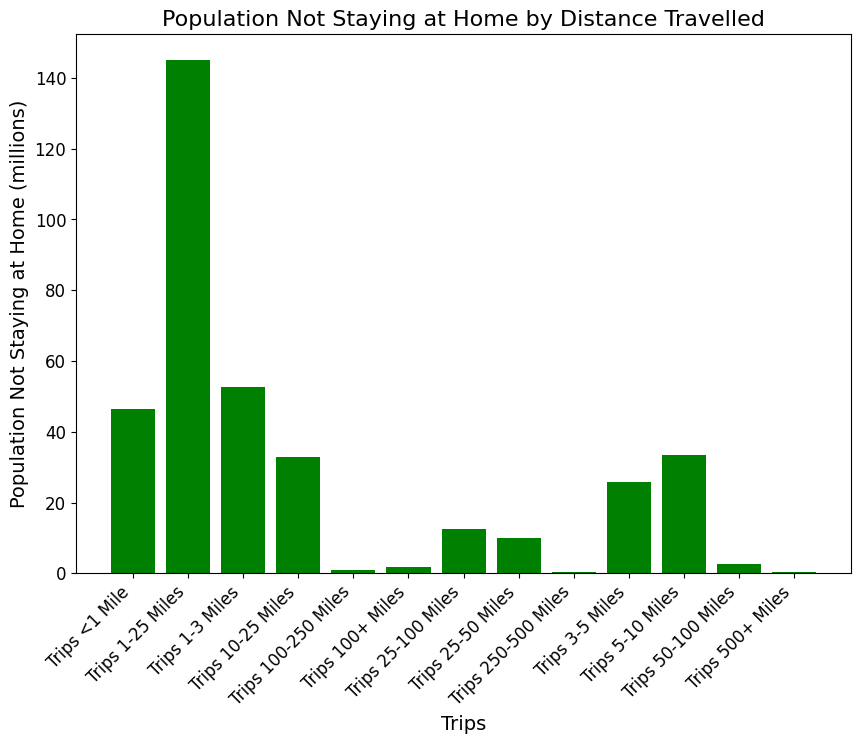

In [11]:

import matplotlib.pyplot as plt

# Plot the data
fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(range(len(meandata.index)), meandata.values, color='green')

# Set title and labels
ax.set_title('Population Not Staying at Home by Distance Travelled', fontsize=16)
ax.set_ylabel('Population Not Staying at Home (millions)', fontsize=14)
ax.set_xlabel('Trips', fontsize=14)

# Set x-axis tick labels and positions
ax.set_xticks(range(len(meandata.index)))
ax.set_xticklabels(meandata.index, rotation=45, ha='right', fontsize=12)

# Set the size of the tick labels on the y-axis
ax.tick_params(axis='y', labelsize=12)


plt.show()


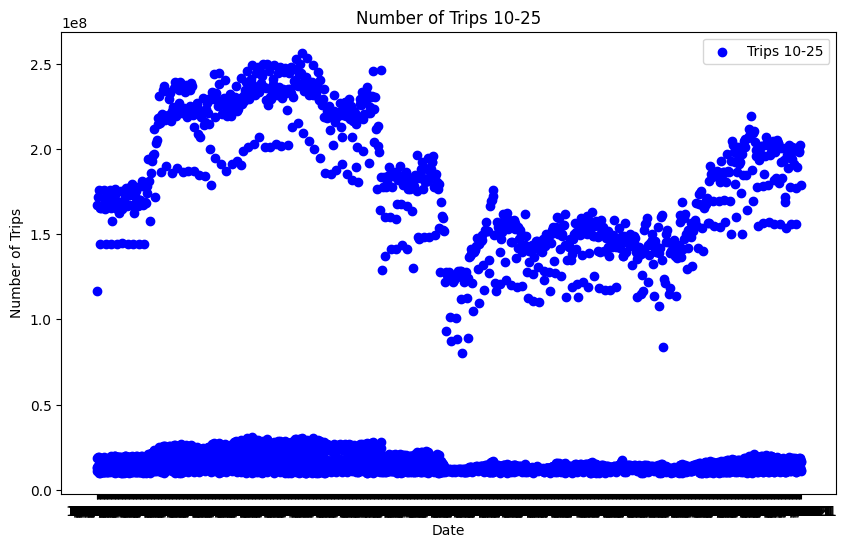

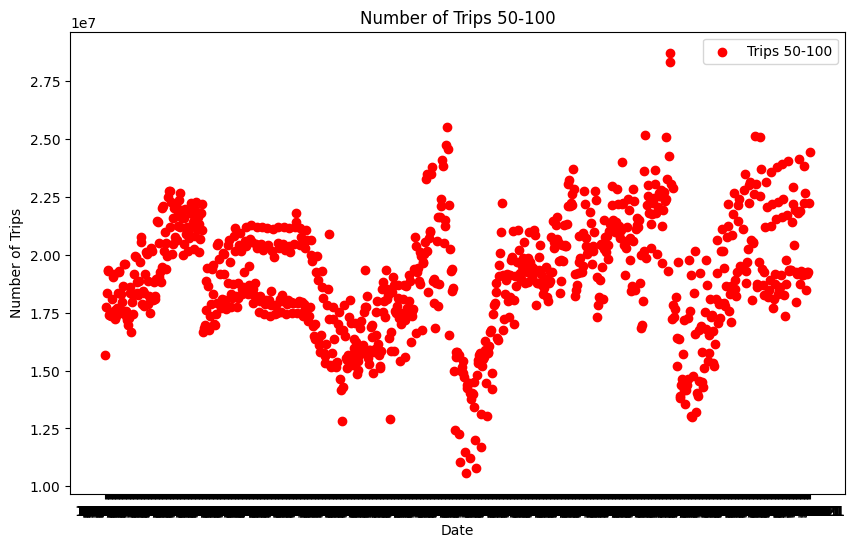

In [12]:

#Filter the DataFrame for trips 10-25 and 50-100
df_10_25 = df[df['Number of Trips 10-25'] > 10000000]
df_50_100 = df[df['Number of Trips 50-100'] > 10000000]


plt.figure(figsize=(10, 6))
plt.scatter(df_10_25['Date'], df_10_25['Number of Trips 10-25'], color='blue', label='Trips 10-25')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.title('Number of Trips 10-25')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df_50_100['Date'], df_50_100['Number of Trips 50-100'], color='red', label='Trips 50-100')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.title('Number of Trips 50-100')
plt.legend()
plt.show()

In [13]:
from dask.distributed import Client
import time

for n_processors in [10, 20]: 
        start_time = time.time()
        average = average.groupby(average.index)['Population Staying at Home'].mean().reset_index()
        average_dist = df_full[('Trips')]
        end_time = time.time() - start_time
        time_taken= end_time
        print(f"Time taken with {n_processors} processors: {end_time} seconds")
        


Time taken with 10 processors: 0.0017359256744384766 seconds
Time taken with 20 processors: 0.0011332035064697266 seconds


/var/folders/bs/9khxsbnj71v_nqkrl5_c7vlw0000gp/T/ipykernel_1850/3865823191.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(meandata.index, rotation=90)


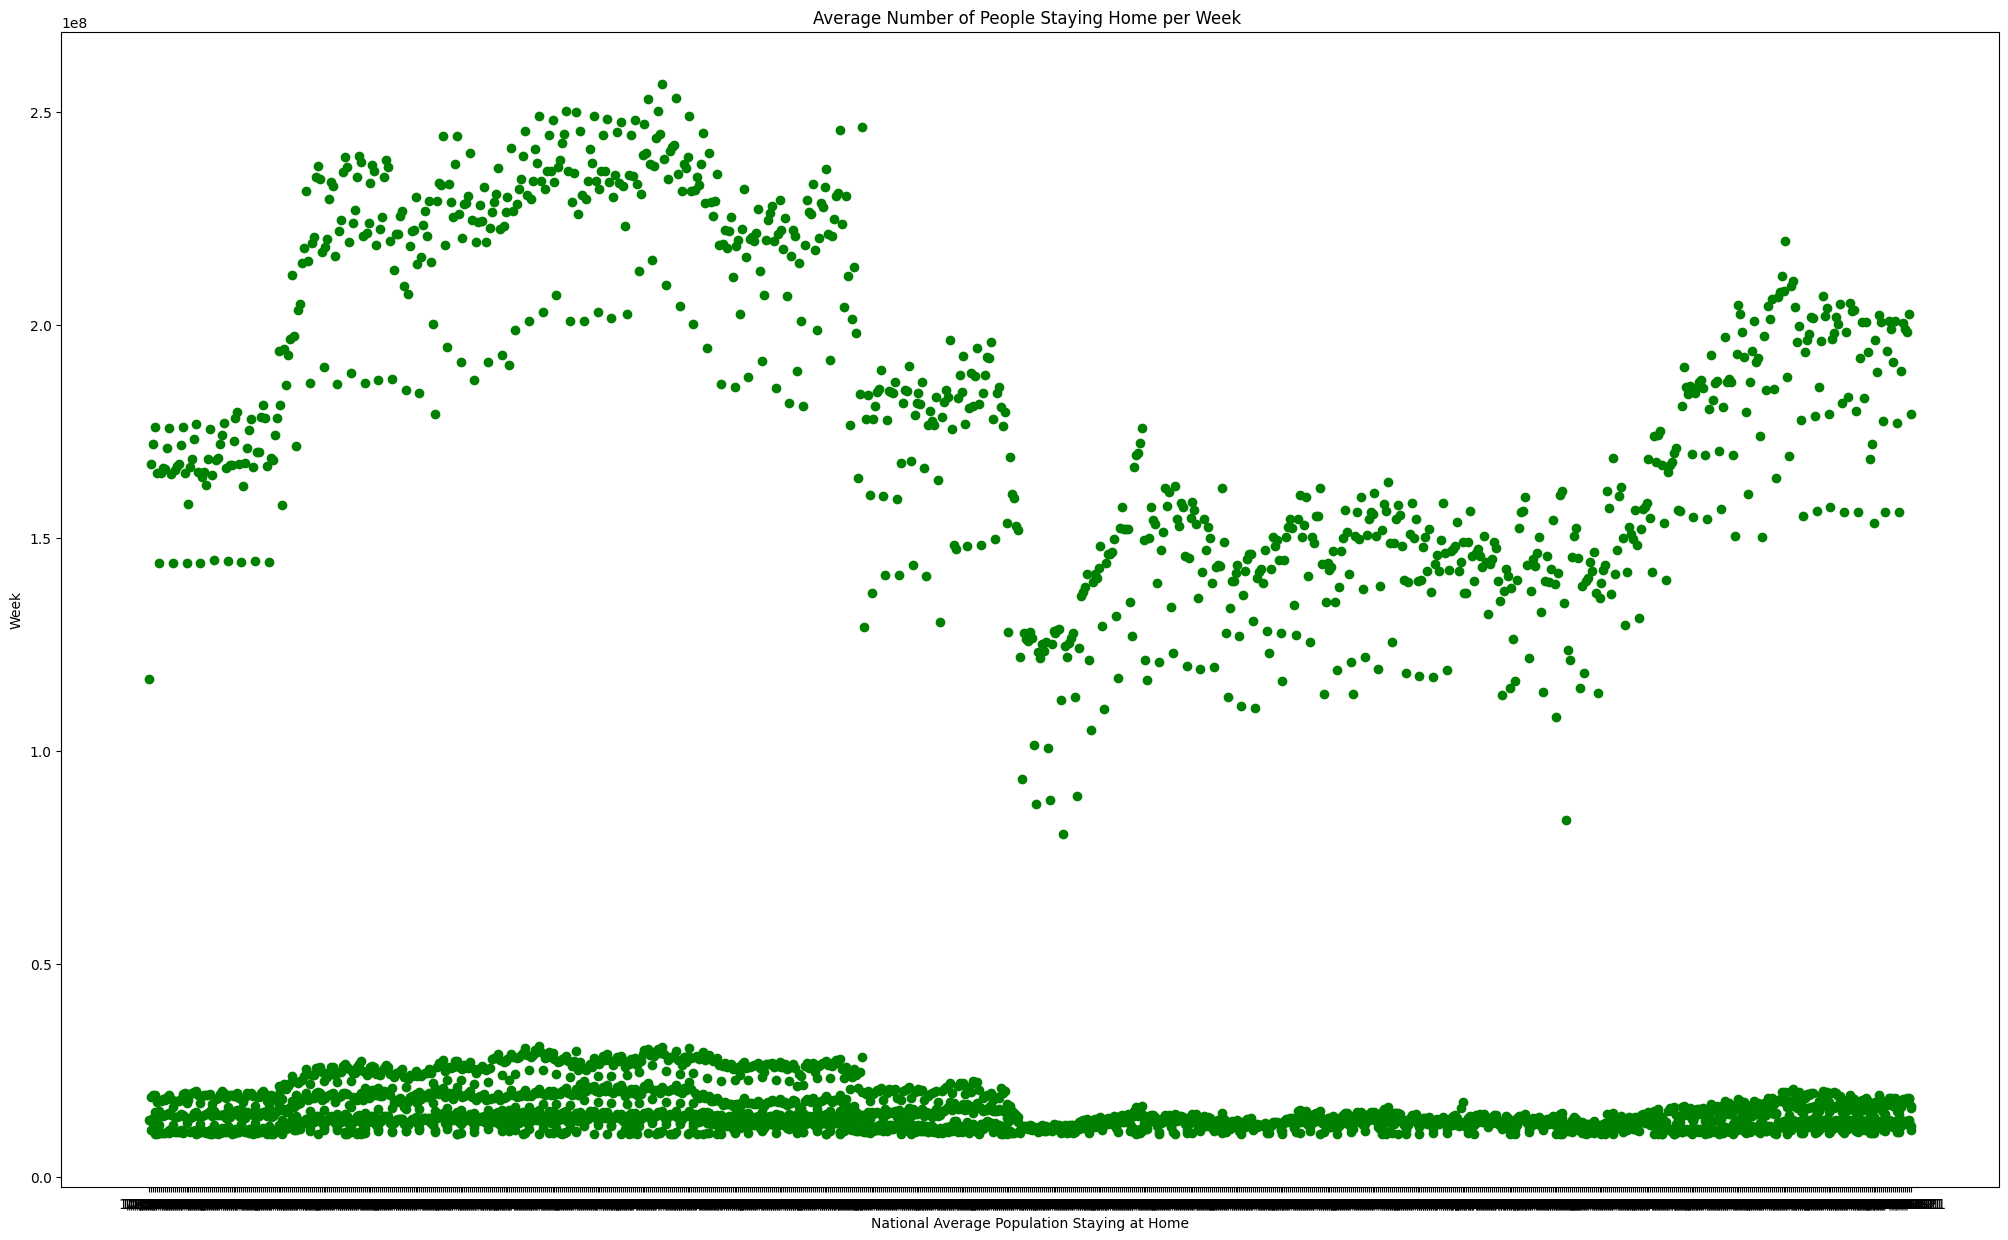

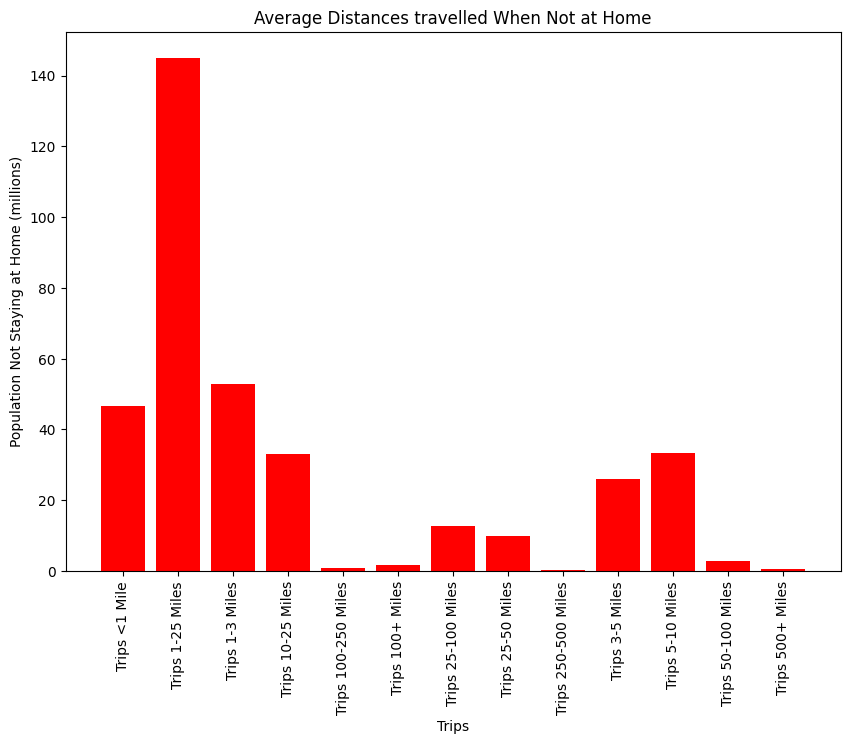

In [14]:
#Scatter Plot for Average People Staying at Home per Week
fig, ax = plt.subplots()
fig.set_size_inches(25,15)
ax.scatter(df_10_25['Date'], df_10_25['Number of Trips 10-25'], color= "green")
ax.set_title('Average Number of People Staying Home per Week ')
ax.set_ylabel('Week')
ax.set_xlabel('National Average Population Staying at Home')

# Bar Plot for "How far are people traveling when they don't stay at Home"
fig, ax = plt.subplots()
fig.set_size_inches(10,7)
plt.bar(meandata.index, meandata.values, color = 'red') 
ax.set_title('Average Distances travelled When Not at Home')
ax.set_ylabel('Population Not Staying at Home (millions)')
ax.set_xlabel('Trips')
ax.set_xticklabels(meandata.index, rotation=90)
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from dask_ml.model_selection import train_test_split
import statsmodels.api as sm

In [16]:
X = df_full[['Trips 1-25 Miles', 'Trips 25-100 Miles']]
y = df[['Number of Trips 5-10', 'Number of Trips 10-25']]



In [17]:
def linear_model(x, y):
    model = LinearRegression()
    model.fit(x, y)
    r_sq = model.score(x, y)
    print(r_sq)
    print(f"coefficient of determination: {r_sq}")
    print(f"intercept: {model.intercept_}")
    print(f"coefficients: {model.coef_}")
    # Model to predict the response
    y_pred = model.predict(x)
    print(f"predicted response:\n{y_pred}")
    
    
    
def polynomial(x, y):
    # Transform input data
    x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)
    # Create a model and fit it
    model = LinearRegression().fit(x_, y)
    # Get results
    r_sq = model.score(x_, y)
    intercept, coefficients = model.intercept_, model.coef_
    # Predict response
    y_pred = model.predict(x_)

    print(r_sq)
    print(f"coefficient of determination: {r_sq}")
    print(f"intercept: {intercept}")
    print(f"coefficients: {coefficients}")
    # Model to predict the response
    print(f"predicted response:\n{y_pred}")


def adv_linear_model(clean_df_full, sampled_df):
    # Extracting the required columns from clean_df_full
    clean_df_full = clean_df_full[["Trips 10-25 Miles", "Trips 5-10 Miles"]]
    
    # Extracting the required column from sampled_df
    x = sampled_df.loc[:, "Number of Trips 25-50"].values.reshape(-1, 1)
    
    # Extracting the required column from clean_df_full
    y = clean_df_full.loc[:, 'Trips 10-25 Miles'].values.reshape(-1, 1)
    
    x = sm.add_constant(x)
    
    # Create the model and fit it
    model = sm.OLS(y, x)
    results = model.fit()
    
    # Printing the results
    print(results.summary())
    print(f"coefficient of determination: {results.rsquared}")
    print(f"adjusted coefficient of determination: {results.rsquared_adj}")
    print(f"regression coefficients: {results.params}")
    
    # Predict response
    print(f"predicted response:\n{results.fittedvalues}")
    print(f"predicted response:\n{results.predict(x)}")


    
    
def model_training(x, y):
    X_train, X_test, y_train, y_test = train_test_split(x, y, shuffle=False)
    model = RandomForestClassifier(verbose=1)
    print(X_train)
    print(X_test)
    print(model.fit(X_train, y_train))
    predictions = model.predict(X_test)
    print(predictions)

In [18]:
import pandas as pd

# Set the desired number of samples
desired_samples = 7  

# Perform simple random sampling
sampled_df = df.sample(n=desired_samples, random_state=42)  

print("Shape of X:", sampled_df.shape)
print("Shape of y:", df_full.shape)


# Now, 'sampled_df' contains a random subset of rows from your original dataset with the desired number of samples.


Shape of X: (7, 22)
Shape of y: (7, 22)


In [19]:
print(clean_df_full.columns)


Index(['Month of Date', 'Week of Date', 'Year of Date', 'Level', 'Date',
       'Week Ending Date', 'Trips <1 Mile', 'People Not Staying at Home',
       'Population Staying at Home', 'Trips', 'Trips 1-25 Miles',
       'Trips 1-3 Miles', 'Trips 10-25 Miles', 'Trips 100-250 Miles',
       'Trips 100+ Miles', 'Trips 25-100 Miles', 'Trips 25-50 Miles',
       'Trips 250-500 Miles', 'Trips 3-5 Miles', 'Trips 5-10 Miles',
       'Trips 50-100 Miles', 'Trips 500+ Miles'],
      dtype='object')


In [31]:
# Test linear_model
#print("Testing linear_model:")
#linear_model(clean_df_full['Trips 1-25 Miles'].values.reshape(-1, 1), sampled_df[['Number of Trips 5-10', 'Number of Trips 10-25']])

# Test polynomial
print("\nTesting polynomial:")
polynomial(clean_df_full['Trips 1-25 Miles'].values.reshape(-1, 1), sampled_df[['Number of Trips 5-10', 'Number of Trips 10-25']])

# Test adv_linear_model
print("\nTesting adv_linear_model:")
adv_linear_model(clean_df_full, sampled_df)

# Test model_training
#print("\nTesting model_training:")
#model_training(df_full['Trips 1-25 Miles'].values.reshape(-1, 1), sampled_df[['Number of Trips 5-10', 'Number of Trips 10-25']])



Testing polynomial:
0.4683864323965697
coefficient of determination: 0.4683864323965697
intercept: [22221764.18705552  3300262.43405295]
coefficients: [[-4.56669927e-02  2.34625701e-11]
 [-7.15088818e-03  3.88616446e-12]]
predicted response:
[[ 34766.99275975  11559.20981569]
 [ 13626.00106538  33627.64617243]
 [ 40740.03769423  45450.7693564 ]
 [291174.96688622 115796.49284639]
 [  3316.48270451  26686.59975034]
 [149158.62275691  79178.40414378]
 [108262.89613297  67519.87791497]]

Testing adv_linear_model:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     1.833
Date:                Fri, 12 Apr 2024   Prob (F-statistic):              0.234
Time:                        00:10:30   Log-Likelihood:                -124.40
No. Observ

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


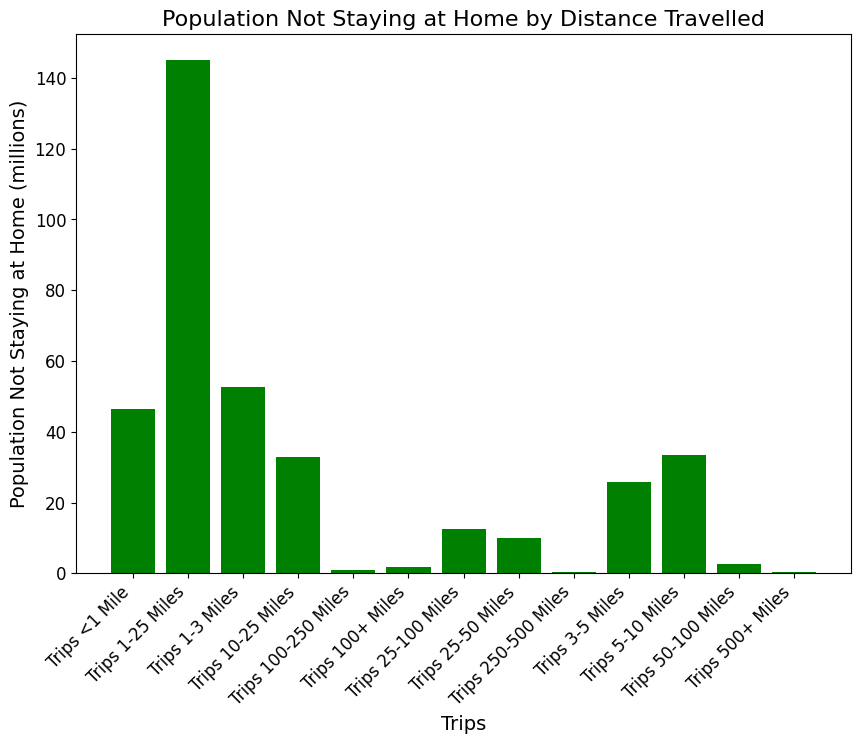

In [21]:
#1e)

import matplotlib.pyplot as plt

# Plot the data
fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(range(len(meandata.index)), meandata.values, color='green')

# Set title and labels
ax.set_title('Population Not Staying at Home by Distance Travelled', fontsize=16)
ax.set_ylabel('Population Not Staying at Home (millions)', fontsize=14)
ax.set_xlabel('Trips', fontsize=14)

# Set x-axis tick labels and positions
ax.set_xticks(range(len(meandata.index)))
ax.set_xticklabels(meandata.index, rotation=45, ha='right', fontsize=12)

# Set the size of the tick labels on the y-axis
ax.tick_params(axis='y', labelsize=12)


plt.show()
